In [ ]:
import matplotlib.pyplot as plt
from random import choice

class RandomWalk():
    def __init__(self, num_points=5000):
        self.num_points = num_points

        self.x_points = [0]
        self.y_points = [0]

    def fill_walk(self):
      while len(self.x_points) < self.num_points:
        x_direction = choice([1, -1])
        x_distance = choice([0,1,2,3,4,5,6,7,8])
        x_step = x_direction * x_distance

        y_direction = choice([1, -1])
        y_distance = choice([-2,-1,0,1,2,3,4,5,6])
        y_step = y_direction * y_distance

        if x_step == 0 and y_step == 0:
          continue

        next_x = self.x_points[-1] + x_step
        next_y = self.y_points[-1] + y_step

        self.x_points.append(next_x)
        self.y_points.append(next_y)

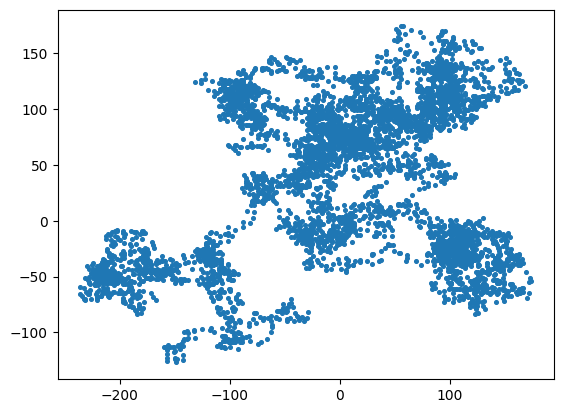

In [ ]:
rw = RandomWalk()
rw.fill_walk()
plt.scatter(rw.x_points, rw.y_points, s = 7)
plt.show()

In [ ]:
while True:
  rw = RandomWalk()
  rw.fill_walk()

  points = list(range(rw.num_points))
  plt.scatter(rw.x_points, rw.y_points, c=points, cmap=plt.cm.Blues, edgecolors='none', s = 7)

  plt.scatter(0 ,0, color = 'green', s=50)
  plt.scatter(rw.x_points[-1], rw.y_points[-1], color = 'red', s=50 )

  plt.axis('off')

  plt.show()

  keep_running = input("Make another walk? (y/n): ")
  if keep_running.lower() == 'n':
    break


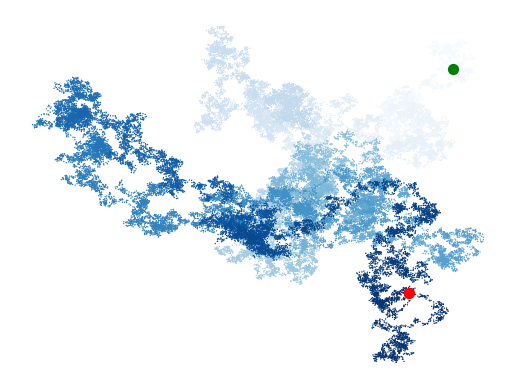

In [ ]:

rw = RandomWalk(50000)
rw.fill_walk()

points = list(range(rw.num_points))
plt.scatter(rw.x_points, rw.y_points, c=points, cmap=plt.cm.Blues, edgecolors='none', s = 1)

plt.scatter(0 ,0, color = 'green', s=50)
plt.scatter(rw.x_points[-1], rw.y_points[-1], color = 'red', s=50 )

plt.axis('off')

plt.show()



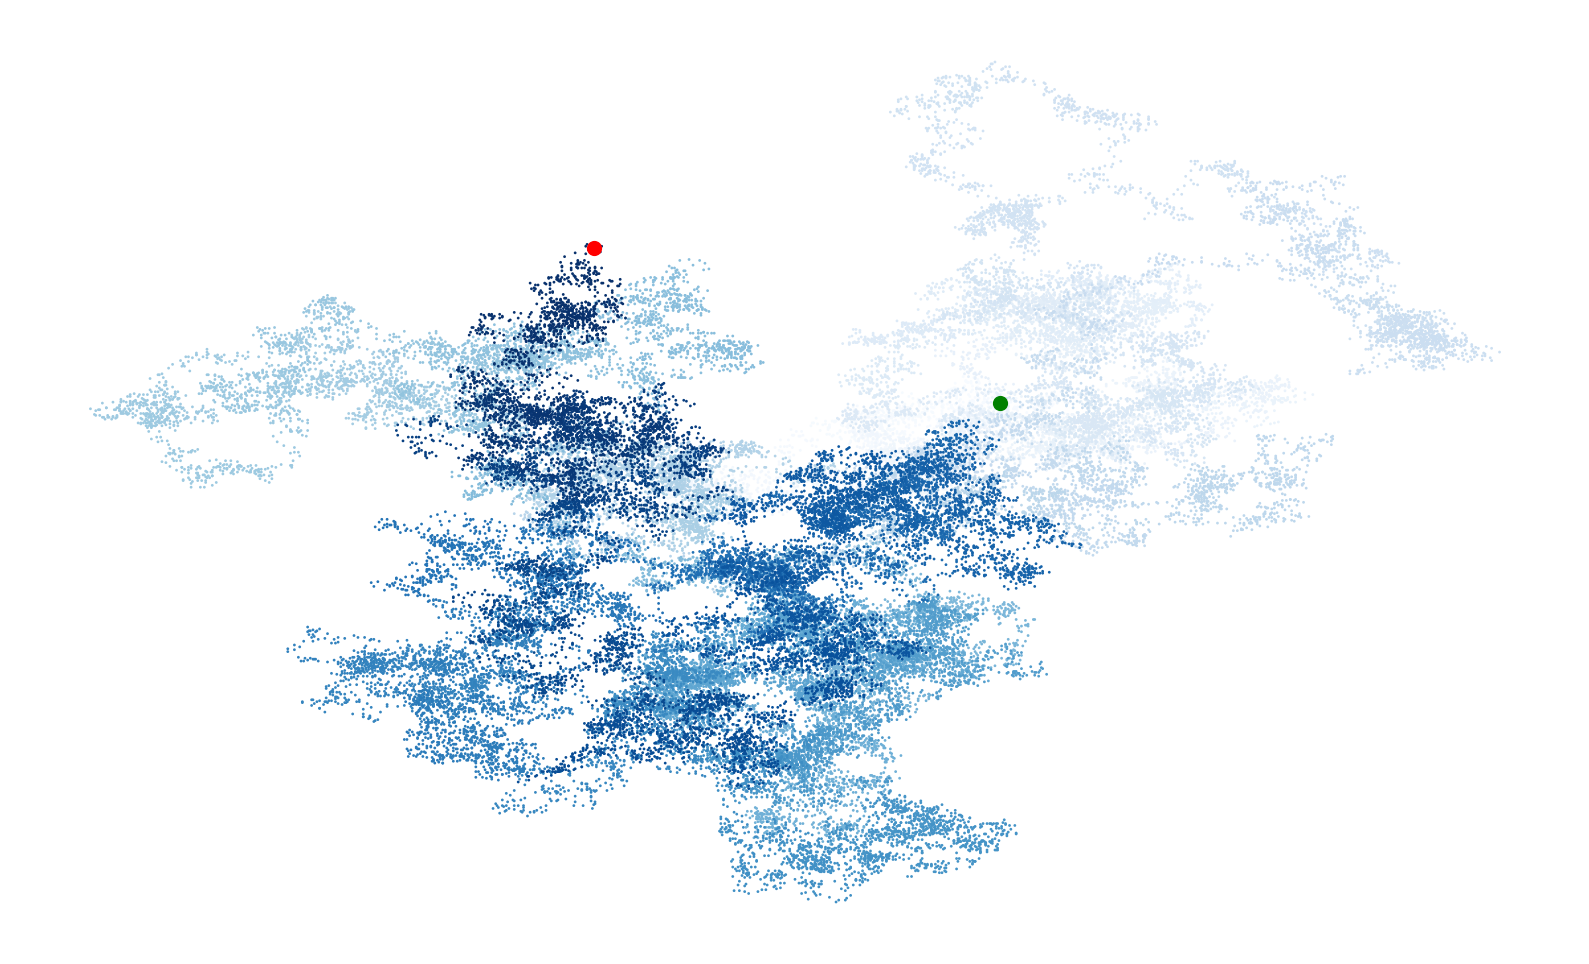

In [ ]:

rw = RandomWalk(50000)
rw.fill_walk()

points = list(range(rw.num_points))

plt.figure(dpi = 200, figsize = (10, 6))

plt.scatter(rw.x_points, rw.y_points, c=points, cmap=plt.cm.Blues, edgecolors='none', s = 1)

plt.scatter(0 ,0, color = 'green', s=20)
plt.scatter(rw.x_points[-1], rw.y_points[-1], color = 'red', s=20 )

plt.axis('off')

plt.show()



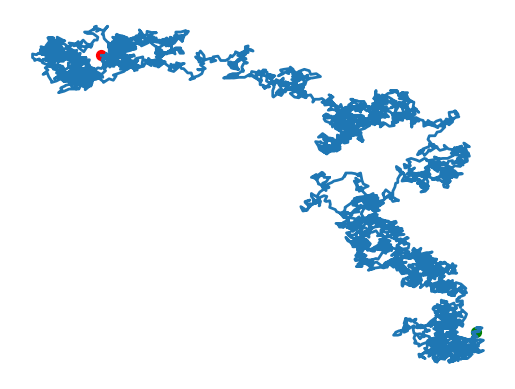

In [ ]:

rw = RandomWalk()
rw.fill_walk()

points = list(range(rw.num_points))
plt.plot(rw.x_points, rw.y_points, linewidth = 2 )

plt.scatter(0 ,0, color = 'green', s=50)
plt.scatter(rw.x_points[-1], rw.y_points[-1], color = 'red', s=50 )

plt.axis('off')

plt.show()



Enter a name to display on the graph: ab


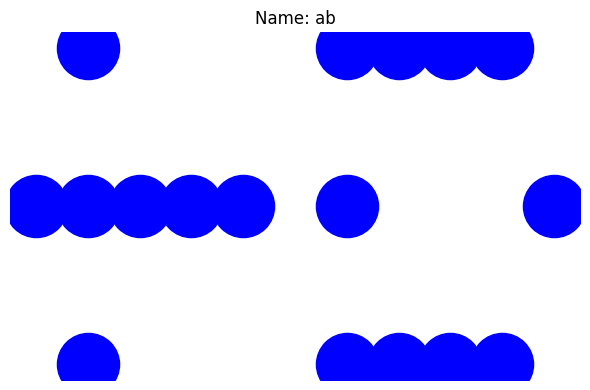

In [ ]:
import matplotlib.pyplot as plt

# Dictionary to store artistic patterns for each letter
artistic_patterns = {
    'a': [(0, 2), (1, 1), (1, 2), (1, 3), (2, 2), (3, 2), (4, 2)],
    'b': [(0, 1), (0, 2), (0, 3), (1, 1), (1, 3), (2, 1), (2, 3), (3, 1), (3, 3), (4, 2)],
    # Add patterns for other letters here
}

# Function to plot each letter of the name using scatter points
def plot_name(name):
    letters = list(name)

    plt.figure(figsize=(6, 4))
    plt.title(f"Name: {name}")

    for i, letter in enumerate(letters):
        pattern = artistic_patterns.get(letter.lower(), None)
        if pattern:
            x_coords, y_coords = zip(*pattern)
            x_coords = [x + i * 6 for x in x_coords]
            plt.scatter(x_coords, y_coords, marker='o', s=2000, c='blue')

    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f"{name}_artistic.png")
    plt.show()

if __name__ == "__main__":
    # Taking user input for the name
    user_name = input("Enter a name to display on the graph: ")

    # Plotting the name in an artistic manner
    plot_name(user_name)


In [ ]:
import re

# ASCII art for the letter 'A'
ascii_art_a = """
         A
        A A
       A   A
      AAAAAAA
     A       A
    A         A
"""

# Function to extract coordinates from ASCII art
def extract_coordinates(ascii_art):
    lines = ascii_art.strip().split('\n')
    coordinates = []
    for y, line in enumerate(lines):
        for x, char in enumerate(line):
            if char != ' ':
                coordinates.append((x, -y))  # Invert y-coordinate for plotting
    return coordinates

# Extract coordinates for 'A'
coordinates_a = extract_coordinates(ascii_art_a)

print(coordinates_a)


[(0, 0), (8, -1), (10, -1), (7, -2), (11, -2), (6, -3), (7, -3), (8, -3), (9, -3), (10, -3), (11, -3), (12, -3), (5, -4), (13, -4), (4, -5), (14, -5)]


In [ ]:
import re
import requests
from bs4 import BeautifulSoup

# Function to fetch ASCII art from the provided link
def fetch_ascii_art(link):
    response = requests.get(link)
    if response.status_code == 200:
        return response.text
    else:
        print("Error fetching ASCII art.")
        return None

# Function to extract coordinates from ASCII art
def extract_coordinates(ascii_art):
    lines = ascii_art.strip().split('\n')
    coordinates = []
    for y, line in enumerate(lines):
        for x, char in enumerate(line):
            if char != ' ':
                coordinates.append((x, -y))  # Invert y-coordinate for plotting
    return coordinates

if __name__ == "__main__":
    # Taking user input for the link of the ASCII art
    ascii_link = input("Enter the link of the ASCII art: ")

    # Fetch ASCII art from the link
    ascii_art = fetch_ascii_art(ascii_link)

    if ascii_art:
        # Extract patterns for all the alphabets
        ascii_patterns = {}
        for letter in 'abcdefghijklmnopqrstuvwxyz':
            pattern_regex = re.compile(rf'\s+{letter}\s+(.*?)\s+{letter}', re.DOTALL | re.IGNORECASE)
            match = pattern_regex.search(ascii_art)
            if match:
                ascii_patterns[letter] = match.group(1)

        # Extract coordinates for each letter and display them
        for letter, letter_ascii in ascii_patterns.items():
            print(f"Letter: {letter}")
            coordinates = extract_coordinates(letter_ascii)
            print(coordinates)
            print("=" * 50)


Enter the link of the ASCII art: http://www.asciiart.eu/
Letter: a
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (17, 0), (18, 0)]


In [ ]:
ascii_art = {
'a': """
        A
       AAA
      AA AA
     AAAAAAA
    AA     AA
   AA       AA
""",
'b': """
   BBBBBBB
   BB    BB
   BBBBBBB
   BB    BB
   BB    BB
   BBBBBBB
""",
'c': """
     CCCCCC
    CC
   CC
   CC
    CC
     CCCCCC
""",
'd': """
   DDDDD
   DD   DD
   DD   DD
   DD   DD
   DD   DD
   DDDDDD
""",
'e': """
   EEEEE
   EE
   EEEEE
   EE
   EE
   EEEEEE
""",
'f': """
   FFFFFF
   FF
   FFFFF
   FF
   FF
   FF
""",
'g': """
    GGGGG
   GG
   GG
   GG   GGGG
   GG     GG
    GGGGGGG
""",
'h': """
   HH    HH
   HH    HH
   HHHHHHHH
   HH    HH
   HH    HH
   HH    HH
""",
'i': """
   IIIIIII
     II
     II
     II
     II
   IIIIIII
""",
'j': """
         JJ
         JJ
         JJ
   JJ    JJ
   JJ    JJ
    JJJJJJ
""",
'k': """
   KK  KK
   KK KK
   KKK
   KK KK
   KK  KK
   KK   KK
""",
'l': """
   LL
   LL
   LL
   LL
   LL
   LLLLLLL
""",
'm': """
   MM       MM
   MMM     MMM
   MM MM MM MM
   MM   MM  MM
   MM       MM
   MM       MM
""",
'n': """
   NN     NN
   NNN    NN
   NN NN  NN
   NN  NN NN
   NN    NNN
   NN     NN
""",
'o': """
    OOOOOO
   OO    OO
   OO    OO
   OO    OO
   OO    OO
    OOOOOO
""",
'p': """
   PPPPPPP
   PP    PP
   PP    PP
   PPPPPPP
   PP
   PP
""",
'q': """
    QQQQQ
   QQ   QQ
   QQ   QQ
   QQ   QQ
    QQQQQ
        QQ
""",
'r': """
   RRRRRR
   RR   RR
   RR   RR
   RRRRRR
   RR   RR
   RR    RR
""",
's': """
    SSSSSS
   SS
    SSSSSSS
          SS
          SS
    SSSSSSS
""",
't': """
   TTTTTTTT
      TT
      TT
      TT
      TT
      TT
""",
'u': """
   UU    UU
   UU    UU
   UU    UU
   UU    UU
   UU    UU
    UUUUUU
""",
'v': """
   VV        VV
   VV        VV
    VV      VV
     VV    VV
      VV  VV
        VV
""",
'w': """
   WW        WW
   WW        WW
   WW   WW   WW
   WW WW  WW WW
   WWW      WWW
   WW        WW
""",
'x': """
   XX     XX
    XX   XX
     XX XX
    XX   XX
   XX     XX
  XX       XX
""",
'y': """
   YY    YY
    YY  YY
      YY
      YY
      YY
      YY
""",
'z': """
   ZZZZZZZ
       ZZ
      ZZ
     ZZ
    ZZ
   ZZZZZZZ
   """
}

In [ ]:
def extract_coordinates(ascii_art):
    coordinates_dict = {}
    for letter, art in ascii_art.items():
        lines = art.strip().split('\n')
        coordinates = []
        for y, line in enumerate(lines):
            for x, char in enumerate(line):
                if char != ' ':
                    coordinates.append((x, -y))  # Invert y-coordinate for plotting
        coordinates_dict[letter] = coordinates
    return coordinates_dict

if __name__ == "__main__":
    # Your 'ascii_art' dictionary containing the ASCII art representations for each letter

    # Extract coordinates for each letter
    coordinates_dict = extract_coordinates(ascii_art)

    # Print the coordinates for each letter
    for letter, coordinates in coordinates_dict.items():
        print(f"Letter: {letter}")
        print(coordinates)
        print("=" * 50)


Letter: a
[(0, 0), (7, -1), (8, -1), (9, -1), (6, -2), (7, -2), (9, -2), (10, -2), (5, -3), (6, -3), (7, -3), (8, -3), (9, -3), (10, -3), (11, -3), (4, -4), (5, -4), (11, -4), (12, -4), (3, -5), (4, -5), (12, -5), (13, -5)]
Letter: b
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (3, -1), (4, -1), (9, -1), (10, -1), (3, -2), (4, -2), (5, -2), (6, -2), (7, -2), (8, -2), (9, -2), (3, -3), (4, -3), (9, -3), (10, -3), (3, -4), (4, -4), (9, -4), (10, -4), (3, -5), (4, -5), (5, -5), (6, -5), (7, -5), (8, -5), (9, -5)]
Letter: c
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (4, -1), (5, -1), (3, -2), (4, -2), (3, -3), (4, -3), (4, -4), (5, -4), (5, -5), (6, -5), (7, -5), (8, -5), (9, -5), (10, -5)]
Letter: d
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (3, -1), (4, -1), (8, -1), (9, -1), (3, -2), (4, -2), (8, -2), (9, -2), (3, -3), (4, -3), (8, -3), (9, -3), (3, -4), (4, -4), (8, -4), (9, -4), (3, -5), (4, -5), (5, -5), (6, -5), (7, -5), (8, -5)]
Letter: e
[(0, 0), (1, 0), (2, 0), (3